# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd

df_archive = pd.read_csv('twitter-archive-enhanced.csv')


In [2]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
import requests
import os

folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = ('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

response = requests.get(url)

open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb').write(response.content)
    
    
    

335079

In [4]:
df_image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
# import tweepy
# import json

# consumer_key = 
# consumer_secret = 
# access_token = 
# access_secret = 

# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth)


In [6]:
# from timeit import default_timer as timer
# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# id_list = df_archive['tweet_id']
# id_list
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in id_list:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# # end = timer()
# # print(end - start)
# #print(fails_dict)

In [7]:
# List of dictionaries to build and convert to a DataFrame later
import json
df_list = []
id_list = df_archive['tweet_id'].tolist()
with open('tweet-json.txt') as outfile:
    try:   
        for id in id_list:
            tweet = outfile.readline()
            tweet = json.loads(tweet)
            rt = tweet['retweet_count']
            fav = tweet['favorite_count']
            # Append to list of dictionaries
            df_list.append({'tweet_id': id,
                            'retweet_count': int(rt),
                            'favorite_count': fav})
    except:
        print("Fail")

Fail


In [8]:
df_list

[{'tweet_id': 892420643555336193,
  'retweet_count': 8853,
  'favorite_count': 39467},
 {'tweet_id': 892177421306343426,
  'retweet_count': 6514,
  'favorite_count': 33819},
 {'tweet_id': 891815181378084864,
  'retweet_count': 4328,
  'favorite_count': 25461},
 {'tweet_id': 891689557279858688,
  'retweet_count': 8964,
  'favorite_count': 42908},
 {'tweet_id': 891327558926688256,
  'retweet_count': 9774,
  'favorite_count': 41048},
 {'tweet_id': 891087950875897856,
  'retweet_count': 3261,
  'favorite_count': 20562},
 {'tweet_id': 890971913173991426,
  'retweet_count': 2158,
  'favorite_count': 12041},
 {'tweet_id': 890729181411237888,
  'retweet_count': 16716,
  'favorite_count': 56848},
 {'tweet_id': 890609185150312448,
  'retweet_count': 4429,
  'favorite_count': 28226},
 {'tweet_id': 890240255349198849,
  'retweet_count': 7711,
  'favorite_count': 32467},
 {'tweet_id': 890006608113172480,
  'retweet_count': 7624,
  'favorite_count': 31166},
 {'tweet_id': 889880896479866881,
  'retwe

In [9]:
tweet_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [10]:
tweet_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Quality issues
1. some of dog breeds in p1,p2 and p3 starts with a capital letter and others starts with small letter, their might be the same breed that was written once with a capital letter and once with a small letter, so we should make them all starts either with a capital letter or small letter.

2. p1_conf, p2_conf, p3_conf should be displayed as a percentage value ( x% ) to make it more readable.

3. Tweet_id should be a string not an integer in both "df_archive" and "df_image_predictions" dataframes.

4. timestamp in "df_archive" has a wrong data type

5. img_num in "df_image_predictions" should be a string since we won't use it to do mathmatical calculations

6. missing some 'expanded_urls' in df_archive, since we don't need them in this analysis, I will drop this column

7. rating_numerator has a cell with value = 121, I think it was written 121 instead of 12 by mistake, since 12 has the most occurences

8. after merging the dog stages into one column, we need to deal with the columns that has a null value

9. keep original ratings that have images ( no retweets ) 

10. in_reply_to_status_id, in_reply_to_user_id retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns in df_archive are not needed in this analysis, and since they contain lots of null values, it's better of we remove them

### Tidiness issues
1. doggo, floofer, pupper, puppo columns in df_archive must be values for a column called "dog_stage"

2. 'Text' column if df_archive contains both texts and urls, urls should be removed

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [11]:
# Make copies of original pieces of data
archive_copy = df_archive.copy()
image_predictions_copy = df_image_predictions.copy()
twitter_copy = tweet_df.copy()

## Quality

### Issue #1:

#### Define: make all p1, p2 and p3 starts with a small letter

#### Code

In [12]:
image_predictions_copy['p1'] = image_predictions_copy['p1'].str.lower()
image_predictions_copy['p2'] = image_predictions_copy['p2'].str.lower()
image_predictions_copy['p3'] = image_predictions_copy['p3'].str.lower()

#### Test

In [13]:
image_predictions_copy[['p1', 'p2', 'p3']]

,p1,p2,p3
0,welsh_springer_spaniel,collie,shetland_sheepdog
1,redbone,miniature_pinscher,rhodesian_ridgeback
2,german_shepherd,malinois,bloodhound
3,rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,rottweiler,doberman
5,bernese_mountain_dog,english_springer,greater_swiss_mountain_dog
6,box_turtle,mud_turtle,terrapin
7,chow,tibetan_mastiff,fur_coat
8,shopping_cart,shopping_basket,golden_retriever
9,miniature_poodle,komondor,soft-coated_wheaten_terrier


### Issue #2: p1_conf, p2_conf, p3_conf should be displayed as a percentage value ( x% ) to make it more readable

#### Define: change p1_conf, p2_conf and p3_conf to strings, take only the two numbers after the decimal, convert it to a string and add the percentage sign to it

#### Code

In [14]:
image_predictions_copy[['p1_conf', 'p2_conf', 'p3_conf']] = image_predictions_copy[['p1_conf', 'p2_conf', 'p3_conf']].astype(str)
image_predictions_copy[['p1_conf', 'p2_conf', 'p3_conf']].dtypes

p1_conf    object
p2_conf    object
p3_conf    object
dtype: object

In [15]:
# take the two numbers after decimal for each row
image_predictions_copy['p1_conf'] = image_predictions_copy['p1_conf'].str[2:4]
image_predictions_copy['p2_conf'] = image_predictions_copy['p2_conf'].str[2:4]
image_predictions_copy['p3_conf'] = image_predictions_copy['p3_conf'].str[2:4]

In [16]:
#remove starting zeros for numbers between 01 to 09
p1_list = image_predictions_copy['p1_conf'].tolist()
p2_list = image_predictions_copy['p2_conf'].tolist()
p3_list = image_predictions_copy['p3_conf'].tolist()


for i, p1_conf in enumerate(p1_list):
    if p1_conf[0] == '0':
        p1_list[i] = p1_conf[1:]
        
for i, p2_conf in enumerate(p2_list):
    if p2_conf[0] == '0':
        p2_list[i] = p2_conf[1:]
        
for i, p3_conf in enumerate(p3_list):
    if p3_conf[0] == '0':
        p3_list[i] = p3_conf[1:]
    
       

#Add'%' for each value in p1_conf, p2_conf and p3_conf
p1_list = image_predictions_copy['p1_conf'].tolist()
p2_list = image_predictions_copy['p2_conf'].tolist()
p3_list = image_predictions_copy['p3_conf'].tolist()


for i, p1_conf in enumerate(p1_list):
        p1_list[i] = p1_conf + '%'
        
for i, p2_conf in enumerate(p2_list):
        p2_list[i] = p2_conf + '%'
        
for i, p3_conf in enumerate(p3_list):
        p3_list[i] = p3_conf + '%'
        

image_predictions_copy['p1_conf'] = p1_list
image_predictions_copy['p2_conf'] = p2_list
image_predictions_copy['p3_conf'] = p3_list

#### Test

In [17]:
image_predictions_copy[['p1_conf', 'p2_conf', 'p3_conf']]

,p1_conf,p2_conf,p3_conf
0,46%,15%,06%
1,50%,07%,07%
2,59%,13%,11%
3,40%,36%,22%
4,56%,24%,15%
5,65%,26%,01%
6,93%,04%,01%
7,69%,05%,05%
8,96%,01%,00%
9,20%,19%,08%


### Issue #3: Tweet_id should be a string not an integer in both "df_archive" and "df_image_predictions" dataframes.

#### Define: change Tweet_id data type to string in "df_archive" and "df_image_predictions" dataframes

#### Code

In [18]:
archive_copy['tweet_id'] = archive_copy['tweet_id'].astype(str)
image_predictions_copy['tweet_id'] = image_predictions_copy['tweet_id'].astype(str)

#### Test

In [19]:
archive_copy[['tweet_id']].dtypes

tweet_id    object
dtype: object

In [20]:
image_predictions_copy[['tweet_id']].dtypes

tweet_id    object
dtype: object

### Issue #4: timestamp in "df_archive" has a wrong data type

#### Define: Change "timestamp" data type to datetime

#### Code

In [21]:
archive_copy['timestamp'] = pd.to_datetime(archive_copy['timestamp'])

#### Test

In [22]:
archive_copy[['timestamp']].dtypes

timestamp    datetime64[ns]
dtype: object

### Issue #5: img_num in "df_image_predictions" should be a string since we won't use it to do mathmatical calculations

#### Define: Change img_num in "df_image_predictions" data type to string

In [23]:
df_image_predictions['img_num'] = df_image_predictions['img_num'].astype(str)

#### Test

In [24]:
df_image_predictions[['img_num']].dtypes

img_num    object
dtype: object

### Issue #6: missing some 'expanded_urls' in df_archive, since we don't need them in this analysis, I will drop this column

### Define: Drop 'expanded_urls' column in df_archive

### Code:

In [25]:
archive_copy.drop("expanded_urls", axis = 1, inplace = True)

### Test:

In [26]:
archive_copy

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,14,10,Cassie,doggo,None,None,None


### Issue #7: rating_numerator has a cell with value = 121, I think it was written 121 instead of 12 by mistake, since 12 has the most occurences

### Define: Change the cell with 'rating_numerator' = 121 to 12

### Code:

In [27]:
index = archive_copy[archive_copy['rating_numerator'] == 121].index
print(index)
archive_copy['rating_numerator'][index] = 12

Int64Index([1635], dtype='int64')


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Test

In [28]:
archive_copy['rating_numerator'][index]

1635    12
Name: rating_numerator, dtype: int64

### Issue #8: after merging the dog stages into one column, we need to deal with the columns that has a null value

### Define: replace null values with 'Other' to indicate that this dog has another dog stage than the four mentioned

### Code:

In [29]:
# This code will throw an error if you run it here because I still haven't 
# dealt with the dog stage column, So I will rewrite this code in Issue 1 in
# Tideness after dealing with the dog stages


# This code is writted in Issue #1 in Tideness 
# df_archive['dog_stage'].fillna('other')

### Issue #9: keep original ratings that have images ( no retweets ) 

### Define: Delete rows that has 'retweeted_status_user_id' not equal to null

### Code: 

In [30]:
archive_copy[pd.isnull(archive_copy['retweeted_status_user_id'])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,14,10,Cassie,doggo,None,None,None


Test:

In [31]:
archive_copy['retweeted_status_user_id'].unique()

array([             nan,   4.19698384e+09,   1.96074000e+07,
         5.12804507e+08,   1.54767397e+08,   7.87461778e+17,
         3.63890752e+08,   5.87097230e+07,   6.66990130e+07,
         7.47554344e+17,   3.41021133e+08,   5.97064155e+08,
         4.11984180e+07,   8.11740824e+08,   7.26634734e+08,
         7.12457247e+17,   4.46675020e+07,   4.87197737e+08,
         2.48855660e+07,   7.99237010e+07,   1.22832566e+09,
         1.73272909e+09,   1.95036846e+08,   2.80479778e+08,
         7.83214000e+05,   4.29683174e+09])

### Issue #10: in_reply_to_status_id, in_reply_to_user_id retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns in df_archive are not needed in this analysis, and since they contain lots of null values, it's better of we remove them

### Define: drop (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp ) columns in image) archive_copy dataframe

### Code:

In [32]:
archive_copy.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'] , axis = 1, inplace = True)

### Test:

In [33]:
archive_copy

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,None,None,None


In [34]:
archive_copy['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

## Tidiness

### Issue #1: doggo, floofer, pupper, puppo columns in df_archive must be values for a column called "dog_stage" 

### Define: create a column called "dog_stage" that has 5possible values ( doggo, floofer, pupper, puppo and other )

### code

In [35]:
# handle "None"
archive_copy['doggo'].replace('None','' , inplace=True)
archive_copy['floofer'].replace('None', '', inplace=True)
archive_copy['pupper'].replace('None', '', inplace=True)
archive_copy['puppo'].replace('None', '', inplace=True)

# merge into column
archive_copy['dog_stage'] = archive_copy.doggo + archive_copy.floofer + archive_copy.pupper + archive_copy.puppo

# handle ''
import numpy as np
archive_copy['dog_stage'].replace('',np.NaN , inplace=True)

archive_copy.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

## Dealing with Quality Issue #8: 

In [36]:
archive_copy['dog_stage'].fillna('other', inplace = True)

### Test

In [37]:
sum(archive_copy['dog_stage'].isna())

0

### Issue #2: 'Text' column if df_archive contains both texts and urls, urls should be removed

### Define: Strip urls from text

### Code: 

In [38]:
Text_list = archive_copy['text'].tolist()


import re
for index, text in enumerate(Text_list):
    new_text = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', text)
    Text_list[index] = new_text
    

    
archive_copy['text'] = Text_list


### Test:

In [39]:
sum(archive_copy['text'].str.contains('http'))

36

### Code:

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [40]:
master_df = pd.concat([archive_copy, image_predictions_copy, tweet_df], join='outer', axis=1)
master_df.to_csv('twitter_archive_master.csv', index = False)
master_df

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,tweet_id,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_id,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,other,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,...,True,collie,15%,True,shetland_sheepdog,06%,True,8.924206e+17,8853.0,39467.0
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,other,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,...,True,miniature_pinscher,07%,True,rhodesian_ridgeback,07%,True,8.921774e+17,6514.0,33819.0
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,other,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,...,True,malinois,13%,True,bloodhound,11%,True,8.918152e+17,4328.0,25461.0
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,other,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,...,True,redbone,36%,True,miniature_pinscher,22%,True,8.916896e+17,8964.0,42908.0
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,other,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,...,True,rottweiler,24%,True,doberman,15%,True,8.913276e+17,9774.0,41048.0
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13,10,None,other,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,...,True,english_springer,26%,True,greater_swiss_mountain_dog,01%,True,8.910880e+17,3261.0,20562.0
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,other,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,...,False,mud_turtle,04%,False,terrapin,01%,False,8.909719e+17,2158.0,12041.0
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13,10,None,other,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,...,True,tibetan_mastiff,05%,True,fur_coat,05%,False,8.907292e+17,16716.0,56848.0
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13,10,Zoey,other,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,...,False,shopping_basket,01%,False,golden_retriever,00%,True,8.906092e+17,4429.0,28226.0
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,...,True,komondor,19%,True,soft-coated_wheaten_terrier,08%,True,8.902403e+17,7711.0,32467.0


In [41]:
pd.Series(list(master_df))

0               tweet_id
1              timestamp
2                 source
3                   text
4       rating_numerator
5     rating_denominator
6                   name
7              dog_stage
8               tweet_id
9                jpg_url
10               img_num
11                    p1
12               p1_conf
13                p1_dog
14                    p2
15               p2_conf
16                p2_dog
17                    p3
18               p3_conf
19                p3_dog
20              tweet_id
21         retweet_count
22        favorite_count
dtype: object

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [42]:
d = pd.read_csv('twitter_archive_master.csv')

### Insights:

### 1. What is the most common dog stage

In [43]:
d['dog_stage'].value_counts()

other           1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

It sounds like "pupper" is the most dog stage appeared in this dataset of the four mentioned

### 2.What is the most dog stage associated with tweets in top 100 number of retweets 

In [44]:
top_100_retweets = d.sort_values(by ='retweet_count', ascending = False).head(100)
top_100_retweets['dog_stage'].value_counts()

other     79
pupper     9
doggo      8
puppo      4
Name: dog_stage, dtype: int64

For the four dog stages we have, 9 of the 100 dogs are pupper stage dogs, 8 of them are doggo stage dogs, while 79 of them are in other stage than the four mentioned

### 3.Has the number of retweets increased over time?

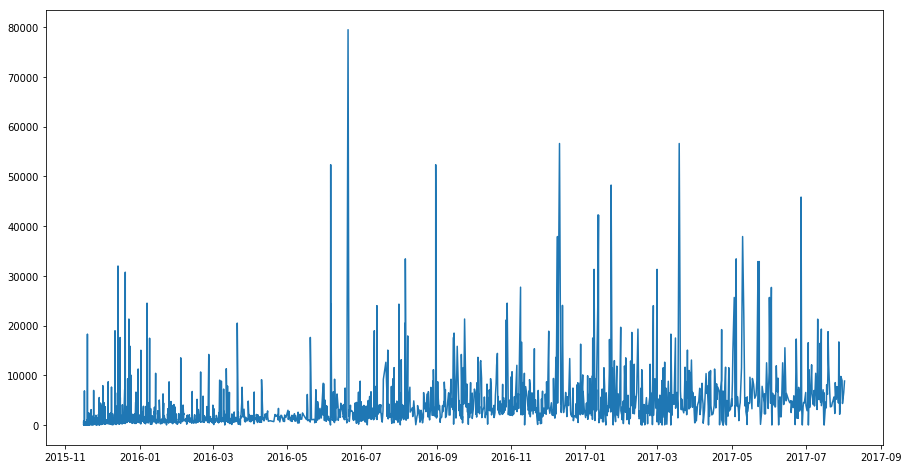

In [49]:
import matplotlib.pyplot as plt

d['timestamp'] = pd.to_datetime(d['timestamp'])
# years = d['timestamp'].dt.year.tolist()
# d['year'] = years 
# d.plot(x='retweet_count', y='year', kind = 'hist');
plt.subplots(figsize=(15, 8))
plt.plot(d.timestamp, d.retweet_count);

### Visualization

### is there a relationship between number of retweets and number of favorite ?

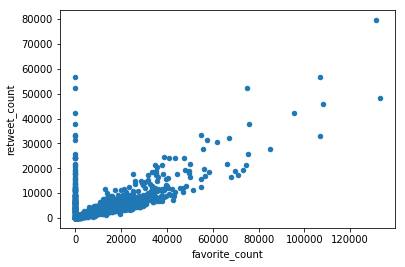

In [46]:
%matplotlib inline

d.plot(x='favorite_count', y='retweet_count', kind = 'scatter');

There seems to be a positive correlation between number of retweets and number of favorites.